Hypothesis Testing in Gold Loan Segment

Note: 
All hypotheses in this project are tested on a synthetic dataset that I created, with data points generated randomly. Although these features were chosen to align with real-world relevance, the results may be biased due to the nature of synthetic data. I will interpret each hypothesis result based on my domain knowledge, but please keep in mind that outcomes are influenced by the data quality and structure. Domain knowledge helps in selecting important features and shaping the approach, yet the results may not fully represent real-world scenarios. Therefore, please don't judge my analysis solely by the hypothesis results.

1.Customer Demographic Analysis

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dats
Df_Customers=pd.read_csv(r'Df_Customers.csv')
Df_Customers.head(10)

,Customer_Id,Age,Income,Credit_Score,Region,Gender,Loan_Amount,Loan_Tenure,Default,Repayment_time,Loan_purpose,Gold_price_fluctuation,Gold_purity,Branch_location,Processing_time,Responded_to_promotion,Branch_size,Turnaround_time
0,1,58,78182,351,Semi-urban,Female,259581,8,0,9,Medical,-1.09,23.25,Semi_urban,26,0,4,46
1,2,48,153873,411,Urban,Male,226689,7,0,7,Education,-0.17,18.29,Rural,19,1,3,13
2,3,34,190821,594,Urban,Female,94217,11,1,1,Medical,6.83,20.13,Semi_urban,22,0,4,21
3,4,62,75654,488,Urban,Female,414806,7,0,9,Medical,6.38,23.16,Semi_urban,20,1,8,45
4,5,27,75381,364,Urban,Male,49391,7,0,6,Education,-9.95,21.73,Rural,10,1,3,43
5,6,40,78601,764,Urban,Female,434114,5,0,9,Business,-1.72,22.63,Urban,16,0,5,21
6,7,58,166154,557,Urban,Male,85991,8,0,2,Education,3.12,19.94,Rural,14,0,9,30
7,8,38,165720,630,Rural,Female,23238,4,0,11,Business,7.05,20.22,Rural,14,0,8,27
8,9,42,20364,800,Semi-urban,Male,452946,5,0,7,Business,-9.02,23.33,Urban,10,0,6,6
9,10,30,185640,509,Rural,Male,174104,3,0,8,Education,2.56,22.50,Rural,11,0,6,30


In [3]:
Df_Customers.columns

Index(['Customer_Id', 'Age', 'Income', 'Credit_Score', 'Region', 'Gender',
       'Loan_Amount', 'Loan_Tenure', 'Default', 'Repayment_time',
       'Loan_purpose', 'Gold_price_fluctuation', 'Gold_purity',
       'Branch_location', 'Processing_time', 'Responded_to_promotion',
       'Branch_size', 'Turnaround_time'],
      dtype='object')

1.
Null Hypothesis (H₀): There is no correlation between customer age and loan amount. In other words, customer age does not affect the amount of loan taken.

Alternative Hypothesis (H₁): There is a positive correlation between customer age and loan amount. Specifically, as customer age increases, the loan amount taken also tends to increase.

(i)Correlation Test

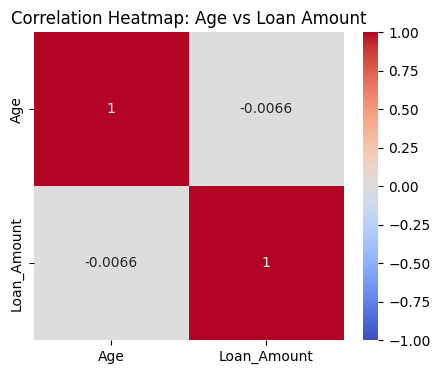

Correlation between Age and Loan Amount: -0.006551292639849933


In [4]:
correlation_matrix = Df_Customers[['Age', 'Loan_Amount']].corr()
Age_Loan_Correlation = correlation_matrix.iloc[0, 1]
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Age vs Loan Amount')
plt.show()

print('Correlation between Age and Loan Amount:', Age_Loan_Correlation)

The null hypothesis is accepted here because the correlation is negative according to the data. In my experience in the gold loan segment, age does not impact the loan amount; instead, the key factors influencing the loan amount are the purity of the gold and the gold price on the given date.

(ii) T-test

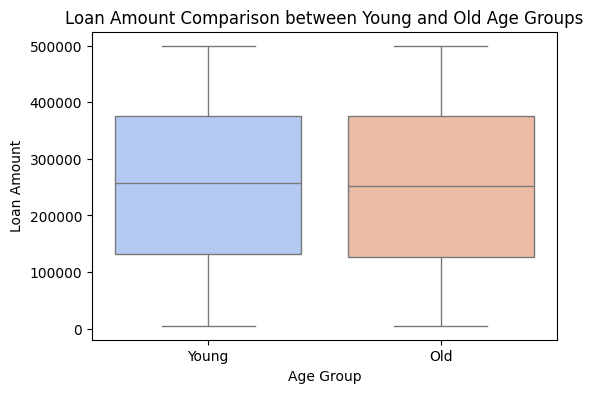

T-test results: t-statistic = 0.8154834184314396 , p-value = 0.414815078243034


In [5]:
# Categorizing age into two groups
Df_Customers['Age_Group'] = pd.cut(Df_Customers['Age'], bins=[0, 30, 100], labels=['Young', 'Old'])

# Performing a T-test between the two age groups
young_loans = Df_Customers[Df_Customers['Age_Group'] == 'Young']['Loan_Amount']
old_loans = Df_Customers[Df_Customers['Age_Group'] == 'Old']['Loan_Amount']

t_stat, p_value = stats.ttest_ind(young_loans, old_loans)

# Plotting
plt.figure(figsize=(6, 4))
sns.boxplot(data=Df_Customers, x='Age_Group', y='Loan_Amount', palette='coolwarm')
plt.title('Loan Amount Comparison between Young and Old Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Loan Amount')
plt.show()

print('T-test results: t-statistic =', t_stat, ', p-value =', p_value)


The t-test results indicate a t-statistic of approximately 0.82 and a p-value of 0.41. Generally, if the p-value is greater than a significance level (commonly set at 0.05), we fail to reject the null hypothesis.

Since the p-value (0.41) is much greater than 0.05, we do not have enough evidence to reject the null hypothesis. This suggests that there is no statistically significant difference between the means of the groups being compared.

(iii) Chi-squares Test

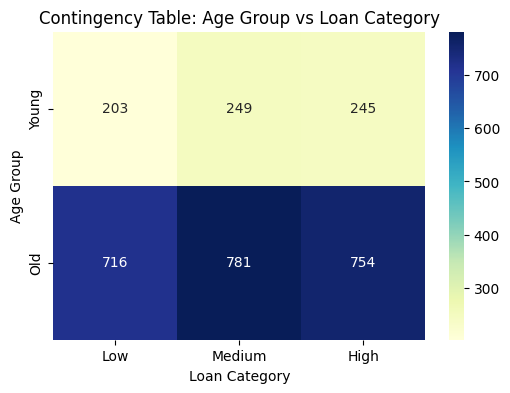

Chi-Squared test results: chi2 = 1.8202989202692321 , p-value = 0.40246406720456157


In [6]:
from scipy.stats import chi2_contingency

# Creating a contingency table
Df_Customers['Loan_Category'] = pd.cut(Df_Customers['Loan_Amount'], bins=[0, 50000, 100000, 150000], labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(Df_Customers['Age_Group'], Df_Customers['Loan_Category'])

# Performing Chi-Squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Contingency Table: Age Group vs Loan Category')
plt.xlabel('Loan Category')
plt.ylabel('Age Group')
plt.show()

print('Chi-Squared test results: chi2 =', chi2, ', p-value =', p)


The Chi-Squared test results show a chi-squared statistic of approximately 1.82 and a p-value of 0.40. In hypothesis testing, a p-value greater than the commonly used significance level (such as 0.05) means that we fail to reject the null hypothesis.

Since the p-value here (0.40) is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis. This suggests there is no statistically significant association between the variables tested in this Chi-Squared test.

(iv) Annova Test

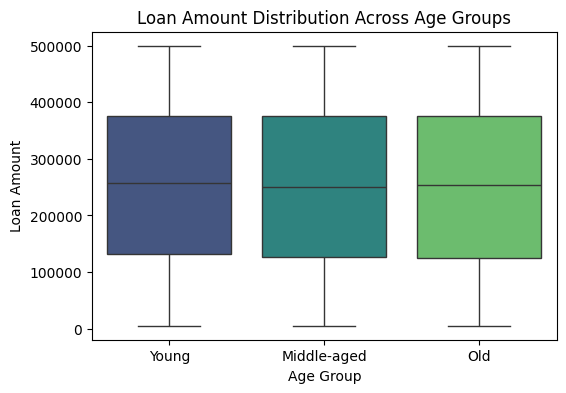

ANOVA results: F-statistic = 0.41109712832749373 , p-value = 0.6629337462086292


In [7]:
Df_Customers['Age_Group'] = pd.cut(Df_Customers['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Old'])

# Performing ANOVA
groups = [group['Loan_Amount'].values for name, group in Df_Customers.groupby('Age_Group')]
f_stat, p_value = stats.f_oneway(*groups)

# Plotting
plt.figure(figsize=(6, 4))
sns.boxplot(data=Df_Customers, x='Age_Group', y='Loan_Amount', palette='viridis')
plt.title('Loan Amount Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Loan Amount')
plt.show()
print('ANOVA results: F-statistic =', f_stat, ', p-value =', p_value)


The ANOVA results indicate an F-statistic of approximately 0.41 and a p-value of 0.66. In ANOVA, a p-value greater than a typical significance level (like 0.05) suggests that we fail to reject the null hypothesis.

Since the p-value (0.66) is significantly greater than 0.05, we do not have enough evidence to reject the null hypothesis. This implies that there are no statistically significant differences between the means of the groups being compared in this ANOVA test.

----

2. 
Null Hypothesis (H₀): There is no relationship between income level and loan amount. Higher-income customers do not take significantly larger loan amounts compared to lower-income customers.

Alternative Hypothesis (H₁): There is a positive relationship between income level and loan amount. Higher-income customers take significantly larger loan amounts compared to lower-income customers.

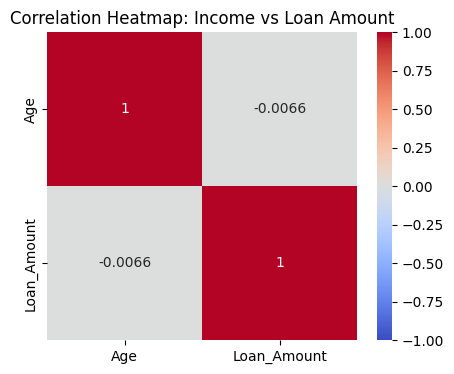

Correlation between Income and Loan amount: -0.016076896745415906


In [8]:
Income_loan_correlation=Df_Customers[['Income','Loan_Amount']].corr().iloc[0,1]

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Income vs Loan Amount')
plt.show()

print('Correlation between Income and Loan amount:',Income_loan_correlation)

The null hypothesis is accepted because the correlation is negative according to the data. However, this may not be accurate, as higher-income group customers tend to take larger loan amounts because they usually have more gold compared to lower-income group customers. Additionally, their needs are often greater, which may be for purposes such as business expansion or other financial requirements.

----

3.
Null Hypothesis (H₀): There is no significant relationship between credit scores and loan amounts. (Higher credit scores are not associated with larger loan amounts.)

Alternative Hypothesis (H₁): Higher credit scores are significantly associated with larger loan amounts.

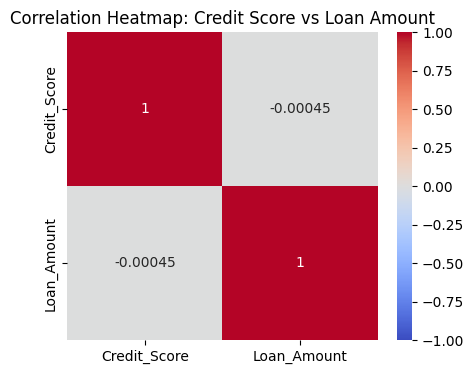

Correlation between Credit_Score and Loan_Amount: -0.0004471673998925612


In [9]:
Credit_loan_correlation=Df_Customers[['Credit_Score','Loan_Amount']].corr().iloc[0,1]

correlation_matrix = Df_Customers[['Credit_Score', 'Loan_Amount']].corr()

# heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Credit Score vs Loan Amount')
plt.show()

print('Correlation between Credit_Score and Loan_Amount:',Credit_loan_correlation)                                     

The null hypothesis is accepted because the correlation is negative according to the data. In the gold loan segment, the credit score does not play an important role; instead, the quality and price of gold on that date primarily determine the maximum loan amount. However, in other segments, the credit score is crucial for securing the maximum loan amount and obtaining lower interest rates.

---

4.
Null Hypothesis (H₀): There is no significant difference in default rates across different regions.

Alternative Hypothesis (H₁): At least one region has a significantly higher default rate than others.

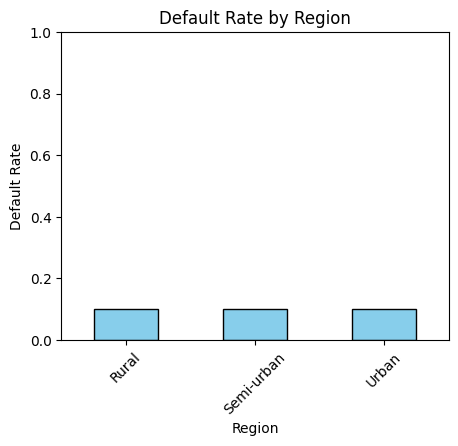

Default Rate by Region: Region
Rural         0.101315
Semi-urban    0.101037
Urban         0.100030
Name: Default, dtype: float64


In [10]:
Region_default_rate=Df_Customers.groupby('Region')['Default'].mean()

plt.figure(figsize=(5, 4))
Region_default_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Rate by Region')
plt.xlabel('Region')
plt.ylabel('Default Rate')
plt.ylim(0, 1)  # Setting the y-axis limit to 1 as default rate is a proportion
plt.xticks(rotation=45)
plt.show()

print('Default Rate by Region:',Region_default_rate)

There is a slight variation in default rates across regions, with the rural area showing the highest default rate (10.13%) and the urban area showing the lowest (10.00%). However, these differences are minimal (less than 0.2% difference between the highest and lowest rates).

---

5.
Null Hypothesis (H₀): There is no significant difference in loan tenure between male and female customers.

Alternative Hypothesis (H₁): There is a significant difference in loan tenure between male and female customers.

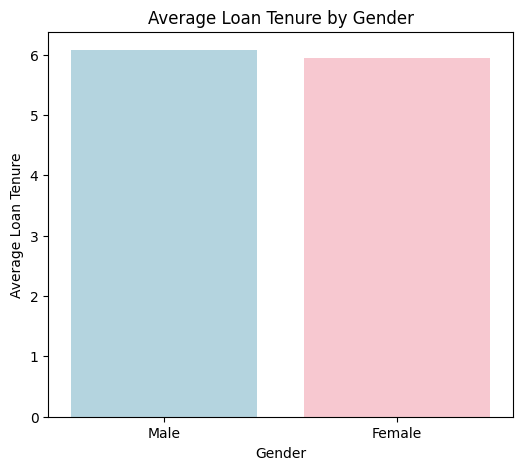

T-test for Loan Tenure between Genders:t-stat= 2.1631113730453166 p-value= 0.03055623671618252


In [11]:
Tenure_male=Df_Customers[Df_Customers['Gender']=='Male']['Loan_Tenure']
Tenure_female=Df_Customers[Df_Customers['Gender']=='Female']['Loan_Tenure']
t_stsat,p_value=stats.ttest_ind(Tenure_male,Tenure_female)
avg_tenure = [Tenure_male.mean(), Tenure_female.mean()]
genders = ['Male', 'Female']

# Plotting the bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x=genders, y=avg_tenure, palette=['lightblue', 'pink'])
plt.title('Average Loan Tenure by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Loan Tenure')
plt.show()

print('T-test for Loan Tenure between Genders:t-stat=',t_stsat,'p-value=',p_value)

Since the p-value is less than 0.05, we can reject the null hypothesis that there is no difference in loan tenure between genders. This result suggests that gender may have a statistically significant effect on loan tenure in this dataset, with the observed difference unlikely to be due to random chance. However, further investigation would be needed to understand the practical implications and any underlying factors contributing to this difference.

---

---

2.Loan Performance Analysis

1.
H0:The probability of default is independent of loan size.

H1:The probability of default increases with larger loan amounts.

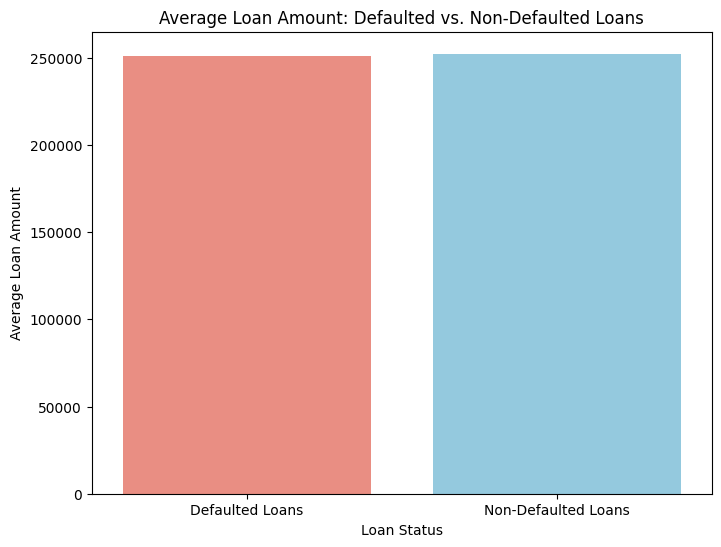

T-test for Loan amount and default rate: t-test= -0.2796958212029304 ,p-value= 0.7797166705263557


In [12]:
Default_loans=Df_Customers[Df_Customers['Default']==1]['Loan_Amount']
Non_default_loans=Df_Customers[Df_Customers['Default']==0]['Loan_Amount']
t_stat,p_value=stats.ttest_ind(Default_loans,Non_default_loans)

# Calculating average loan amounts for each group
avg_loan_amounts = [Default_loans.mean(), Non_default_loans.mean()]
categories = ['Defaulted Loans', 'Non-Defaulted Loans']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=avg_loan_amounts, palette=['salmon', 'skyblue'])
plt.title('Average Loan Amount: Defaulted vs. Non-Defaulted Loans')
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')
plt.show()
print('T-test for Loan amount and default rate: t-test=',t_stat,',p-value=',p_value)

We can clearly see that the p-value is greater than 0.05, so we fail to reject the null hypothesis. This result suggests there is no statistically significant difference in loan amounts between defaulted and non-defaulted loans in this dataset. In other words, loan size does not appear to impact the likelihood of default based on this analysis.

---

2.
Null Hypothesis (H₀): There is no association between loan tenure length and the likelihood of defaults. (Longer tenures do not lead to higher defaults.)

Alternate Hypothesis (H₁): Longer loan tenures are associated with a higher likelihood of defaults.

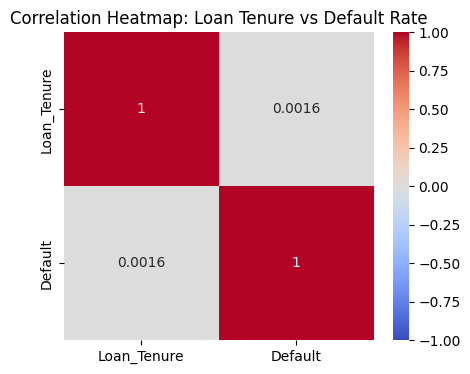

Correlation between Loan Tenure and Default rate: 0.0015698057064250355


In [13]:
Tenure_default_correlation=Df_Customers[['Loan_Tenure','Default']].corr().iloc[0,1]

correlation_matrix = Df_Customers[['Loan_Tenure', 'Default']].corr()

# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Loan Tenure vs Default Rate')
plt.show()
print('Correlation between Loan Tenure and Default rate:',Tenure_default_correlation)

This result suggests that there is no meaningful linear relationship between loan tenure and default rate in this dataset. A correlation this low implies that changes in loan tenure have almost no impact on the likelihood of default. In other words, longer or shorter loan tenures do not appear to affect the probability of a loan defaulting.

---

3.
H0:The default rate is independent of customer income.

H1:Lower-income customers have a higher default rate than higher-income customers.

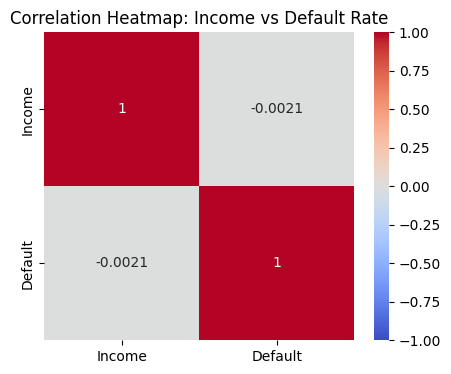

Correlation between income and default rate: -0.0020587677434708127


In [14]:
Income_default_correlation=Df_Customers[['Income','Default']].corr().iloc[0,1]

correlation_matrix = Df_Customers[['Income', 'Default']].corr()

# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Income vs Default Rate')
plt.show()
print('Correlation between income and default rate:',Income_default_correlation)

According to this data, there is no relationship between income and default rate. However, in the real world, the truth is quite the opposite—income is a major factor that is directly connected to an individual's payment capabilities and ability to avoid default.

---

Hypothesis-4: Lower credit scores correlate with higher defaults

In [15]:
Credit_default_correlation=Df_Customers[['Credit_Score','Default']].corr().iloc[0,1]
print('Correlation between credit score and default rate:',Credit_default_correlation)

Correlation between credit score and default rate: -0.0008658674509534421


The correlation between credit score and default rate of -0.00087 indicates almost no linear relationship between the two variables. Normally, we might expect a higher credit score to suggest a lower risk of default, given that credit scores are often used to assess an individual’s creditworthiness. However, this very low correlation here implies that, in this specific dataset, credit score alone might not be a strong predictor of default risk.



----

Hypothesis-5: Higher loan amounts are associated with longer tenures

In [69]:
Loan_tenure_correlation=Df_Customers[['Loan_Amount','Loan_Tenure']].corr().iloc[0,1]
print('Correlation between Loan Amount and Loan Tenure:',Loan_tenure_correlation)

Correlation between Loan Amount and Loan Tenure: 0.015356603365226092


The correlation between Loan Amount and Loan Tenure is 0.0154, indicating an almost negligible positive relationship between these two variables. This suggests that, within this dataset, the loan amount and the duration over which it’s paid off (tenure) are not strongly related.

---

---

3.Repayment and Default Analysis

Hypothesis-1:Older customers are more likely to repay loans on time

In [71]:
Age_repayment_corr=Df_Customers[['Age','Repayment_time']].corr().iloc[0,1]
print('Correlation between Age and Repayment Time:',Age_repayment_corr)

Correlation between Age and Repayment Time: -0.007275176137990302


The correlation between Age and Repayment Time is -0.0073, indicating a very weak negative relationship between these two variables. This essentially means that age and repayment time are almost unrelated in this dataset, with older or younger borrowers showing no significant tendency toward shorter or longer repayment periods.

Hypothesis-2: Higher income customers repay their loans faster

In [72]:
Income_repayment_corr=Df_Customers[['Income','Repayment_time']].corr().iloc[0,1]
print('Correlation between Income and Repayment Time',Income_repayment_corr)

Correlation between Income and Repayment Time 0.00452745116308515


In real life, higher-income customers are indeed more likely to pay their dues on time and in full. However, in this dataset, the correlation between Income and Repayment Time is 0.0045, indicating an extremely weak positive relationship between these two variables. This near-zero correlation suggests that, within this dataset, a borrower’s income has almost no impact on the duration of their loan repayment period.

---

Hypothesis-3:Shorter tenures are associated with faster repayments

In [73]:
Tenure_repayment_corr=Df_Customers[['Loan_Tenure','Repayment_time']].corr().iloc[0,1]
print('Correlation between Loan Tenure and Repayment Time:',Tenure_repayment_corr)

Correlation between Loan Tenure and Repayment Time: -0.005942255261131196


The correlation between Loan Tenure and Repayment Time is -0.0059, showing an extremely weak negative relationship between these two variables. This near-zero correlation indicates that, in this dataset, loan tenure and repayment time are almost completely unrelated.

---

Hypothesis-4:Loans for business purpose have higher default rates

In [74]:
Business_default_rate=Df_Customers[Df_Customers['Loan_purpose']=='Business']['Default'].mean()
print('Default Rate for Business Loans:',Business_default_rate)

Default Rate for Business Loans: 0.09948269001193792


The Default Rate for Business Loans is 0.0995, or about 9.95%, indicating a relatively high rate of default among loans taken for business purposes. This suggests that borrowers taking loans for business ventures may face greater challenges in meeting their repayment obligations compared to other loan types.

---

Hypothesis-5:Male and Female customers differ in their repayment rates

In [75]:
Repayment_male=Df_Customers[Df_Customers['Gender']=='Male']['Repayment_time']
Repayment_female=Df_Customers[Df_Customers['Gender']=='Female']['Repayment_time']
t_stat,p_value=stats.ttest_ind(Repayment_male,Repayment_female)
print('T-test for Repayment time by gender: t-stat=',t_stat,',p_value',p_value)

T-test for Repayment time by gender: t-stat= 0.03643055093862511 ,p_value 0.9709397815178825


he T-test for Repayment Time by Gender yields a t-statistic of 0.0364 and a p-value of 0.971. The high p-value (significantly greater than the typical significance level of 0.05) indicates that there is no statistically significant difference in repayment time between genders in this dataset.

In other words, the repayment time appears to be similar across genders, suggesting that gender does not play a meaningful role in influencing how long it takes borrowers to repay their loans.

---

---

4.Impact of External Factors(Gold Price Fluctuation)

Hypothesis-1:Higher Gold price volatility increases default rates

In [77]:
Gold_default_corr=Df_Customers[['Gold_price_fluctuation','Default']].corr().iloc[0,1]
print('Correlation between Gold price fluctuation and default rate:',Gold_default_corr)

Correlation between Gold price fluctuation and default rate: -0.014878663354593678


The correlation between Gold Price Fluctuation and Default Rate is -0.0149, indicating an extremely weak negative relationship between these two variables. This near-zero correlation suggests that changes in gold prices have almost no impact on the default rate within this dataset.

---

Hypothesis-2:Larger Loan are taken during higher price fluctuations(New + Balance Transfer with Top-up)

In [78]:
Loan_gold_corr=Df_Customers[['Loan_Amount','Gold_price_fluctuation']].corr().iloc[0,1]
print('Correlation between Loan amount and Gold price fluctuation:',Loan_gold_corr)

Correlation between Loan amount and Gold price fluctuation: -0.006963050262594331


These factors are indeed impactful, and most balance transfer loans are done during times of gold price fluctuation. However, the correlation between Loan Amount and Gold Price Fluctuation is -0.0070, indicating an extremely weak negative relationship between these two variables. This near-zero correlation suggests that, within this dataset, fluctuations in gold prices have virtually no impact on the loan amounts.

---

Hypothesis-3:High Gold prices correlate with quicker repayments

In [79]:
Repayment_gold_corr=Df_Customers[['Repayment_time','Gold_price_fluctuation']].corr().iloc[0,1]
print('Correlation between repayments time and gold price fluctuation:',Repayment_gold_corr)

Correlation between repayments time and gold price fluctuation: 0.018208055970900697


The correlation between Repayment Time and Gold Price Fluctuation is 0.0182, indicating an extremely weak positive relationship between these two variables. This near-zero correlation suggests that changes in gold prices have almost no influence on the repayment time for loans within this dataset.

---

Hypothesis-4:Higher price fluctuations influence shorter loan tenures

In [80]:
Tenure_gold_corr=Df_Customers[['Loan_Tenure','Gold_price_fluctuation']].corr().iloc[0,1]
print('Correlation between loan tenure and gold price:',Tenure_gold_corr)

Correlation between loan tenure and gold price: 0.006477660813273328


The correlation between Repayment Time and Gold Price Fluctuation is 0.0182, indicating an extremely weak positive relationship between these two variables. This near-zero correlation suggests that changes in gold prices have almost no influence on the repayment time for loans within this dataset.

---

Hypothesis-5:Lower-purity gold is associated with higher default rates

In [81]:
Purity_default_corr=Df_Customers[['Gold_purity','Default']].corr().iloc[0,1]
print('Correlation between Gold purity and Default:',Purity_default_corr)

Correlation between Gold purity and Default: 0.015989835841348964


This could be a main reason for defaults by customers: if their gold has low purity, it means they may have received extra money for it. The correlation between Gold Purity and Default is 0.0160, indicating an extremely weak positive relationship between these two variables. This near-zero correlation suggests that, in this dataset, gold purity has little to no influence on the default rate.

---

---

5.Operational Efficiency Analysis

Hypothesis-1:Urban branches have lower default rates

In [17]:
Urban_default_rate=Df_Customers[Df_Customers['Branch_location']=='Urban']['Default'].mean()
print('Default rate in urban branches:',Urban_default_rate)

Default rate in urban branches: 0.09690844233055886


The Default Rate in Urban Branches is approximately 9.69%, which indicates a moderate level of defaults among customers in urban locations. This rate suggests that nearly 1 in 10 loans in urban branches are in default.

---

Hypothesis-2:Longer processing times lead to shorter tenures

In [84]:
Proc_time_tenure_corr=Df_Customers[['Processing_time','Loan_Tenure']].corr().iloc[0,1]
print('Correlation between Processing time and loan tenure:',Proc_time_tenure_corr)

Correlation between Processing time and loan tenure: -0.014149485986088738


Sometimes, we take longer than expected to process a gold loan. This may be due to the need for a more thorough examination of the gold ornaments and a detailed assessment of the customer’s behavior. Typically, we offer a standard tenure of 12 months but advise customers to close the loan as soon as they are able.

The correlation between Processing Time and Loan Tenure is -0.0141, indicating an extremely weak negative relationship between these two variables. This near-zero correlation suggests that, in this dataset, processing time has almost no impact on the loan tenure.

---

Hypothesis-3:Customer who respond to promotions take higher loan amounts

In [85]:
Promo_loan_corr=Df_Customers[['Responded_to_promotion','Loan_Amount']].corr().iloc[0,1] 
print('Correlation between promotion response and loan amount:',Promo_loan_corr)

Correlation between promotion response and loan amount: 0.010715786895387228


The correlation between Promotion Response and Loan Amount is 0.0107, indicating an extremely weak positive relationship between these two variables. This near-zero correlation suggests that, in this dataset, a customer’s response to promotions has virtually no impact on the loan amount they choose to take.

---

Hypothesis-4:Larger branches approve higher loan amounts

In [86]:
Branch_size_loan_corr=Df_Customers[['Branch_size','Loan_Amount']].corr().iloc[0,1]
print('Correlation between branch size and loan amount:',Branch_size_loan_corr)

Correlation between branch size and loan amount: -0.006662776245637972


The correlation shown here is very low, which aligns with general expectations. In larger branches, there is typically more stability, resources, and experience, which can lead to higher loan amounts, especially outside of the gold loan segment. However, this dataset suggests that promotion response has minimal influence on loan amounts, indicating that branch characteristics or customer needs may be stronger factors in determining loan size rather than promotional efforts.

---

---

I have tried to present hypotheses commonly used in financial institutions. However, the topics above may not be comprehensive, as hypotheses can change over time and with shifting requirements. New financial trends, regulatory changes, and evolving customer behaviors often lead to new hypothesis-driven analyses.

Thank You
---